In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import imageio
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, \
        explained_variance_score, mean_squared_log_error, \
        classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, \
                                    PolynomialFeatures
from sklearn.decomposition import PCA
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets, linear_model, svm
import statsmodels.api as sm
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.base import clone
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator
import csv
from itertools import permutations, combinations, chain, tee
import scipy.special
import random
import math
from collections import defaultdict, OrderedDict
from catboost import CatBoostRegressor
from catboost import CatBoost

In [2]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true).reshape(-1)
    y_pred = np.array(y_pred).reshape(-1)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def print_scores(y_test, y_pred):
    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('MAE: ', mean_absolute_error(y_test, y_pred))
    #print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    print('R2:  ', r2_score(y_test, y_pred))
    print('VAR:  ', np.var(y_test))

In [3]:
df = pd.read_csv('dataset12.csv')

c:\users\admin\work\featureimportance\venv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (52) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.columns

Index(['filename', 'cyclo', 'cyclo_method_avg', 'cyclo_method_min',
       'cyclo_method_max', 'npath_method_avg', 'npath_method_min',
       'npath_method_max', 'ncss', 'ncss_method_avg', 'ncss_method_min',
       'ncss_method_max', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20_5', 'P20_7', 'P20_11', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P28', 'P29', 'P30', 'P33', 'M1', 'M2', 'M3_1', 'M3_2', 'M3_3', 'M3_4',
       'M4', 'M5', 'M6', 'lines_P1', 'lines_P2', 'lines_P3', 'lines_P4',
       'lines_P5', 'lines_P6', 'lines_P7', 'lines_P8', 'lines_P9', 'lines_P10',
       'lines_P11', 'lines_P12', 'lines_P13', 'lines_P14', 'lines_P15',
       'lines_P16', 'lines_P17', 'lines_P18', 'lines_P19', 'lines_P20_5',
       'lines_P20_7', 'lines_P20_11', 'lines_P21', 'lines_P22', 'lines_P23',
       'lines_P24', 'lines_P25', 'lines_P26', 'lines_P28', 'lines_P29',
       'lines_P30', 'lines_P33'

In [5]:
def get_patterns_config():
        return {
            "patterns": [
                {"name": "Asserts", "code": "P1", "make": lambda: P1()},
                {"name": "Setters", "code": "P2", "make": lambda: P2()},
                {"name": "Empty Rethrow", "code": "P3", "make": lambda: P3()},
                {"name": "Prohibited class name", "code": "P4", "make": lambda: P4()},
                {"name": "Force Type Casting", "code": "P5", "make": lambda: P5()},
                {"name": "Count If Return", "code": "P6", "make": lambda: P6()},
                {"name": "Implements Multi", "code": "P7", "make": lambda: P7()},
                {"name": "Instance of", "code": "P8", "make": lambda: P8()},
                {"name": "Many primary constructors", "code": "P9", "make": lambda: P9()},
                {"name": "Method chain", "code": "P10", "make": lambda: P10()},
                {"name": "Multiple try", "code": "P11", "make": lambda: P11()},
                {"name": "Non final attribute", "code": "P12", "make": lambda: P12()},
                {"name": "Null check", "code": "P13", "make": lambda: P13()},
                {"name": "Partial synchronized", "code": "P14", "make": lambda: P14()},
                {"name": "Redundant catch", "code": "P15", "make": lambda: P15()},
                {"name": "Return null", "code": "P16", "make": lambda: P16()},
                {"name": "String concat", "code": "P17", "make": lambda: P17()},
                {"name": "Super Method", "code": "P18", "make": lambda: P18()},
                {"name": "This in constructor", "code": "P19", "make": lambda: P19()},
                {
                    "name": "Var declaration distance for 5 lines",
                    "code": "P20_5",
                    "make": lambda: P20(5)
                },
                {
                    "name": "Var declaration distance for 7 lines",
                    "code": "P20_7",
                    "make": lambda: P20(7)
                },
                {
                    "name": "Var declaration distance for 11 lines",
                    "code": "P20_11",
                    "make": lambda: P20(11)
                },
                {"name": "Var in the middle", "code": "P21", "make": lambda: P21()},
                {"name": "Array as function argument", "code": "P22", "make": lambda: P22()},
                {"name": "Joined validation", "code": "P23", "make": lambda: P23()},
                {"name": "Non final class", "code": "P24", "make": lambda: P24()},
                {"name": "Private static method", "code": "P25", "make": lambda: P25()},
                {"name": "Public static method", "code": "P26", "make": lambda: P26()},
                #{"name": "Var siblings", "code": "P27", "make": lambda: P27()},
                {"name": "Null Assignment", "code": "P28", "make": lambda: P28()},
                {"name": "Multiple While", "code": "P29", "make": lambda: P29()},
                {"name": "Protected Method", "code": "P30", "make": lambda: P30()},
                #{"name": "Send Null", "code": "P31", "make": lambda: P31()},
                #{"name": "Nested Loop", "code": "P32", "make": lambda: P32()},
                #{"name": "MultipleWhile", "code": "P33", "make": lambda: P33()},

            ],
            "metrics": [
                {"name": "Entropy", "code": "M1", "make": lambda: M1()},
                {"name": "NCSS lightweight", "code": "M2", "make": lambda: M2()},
                {
                    "name": "Indentation counter: Right total variance",
                    "code": "M3_1",
                    "make": lambda: M3(right_var=True)
                },
                {
                    "name": "Indentation counter: Left total variance",
                    "code": "M3_2",
                    "make": lambda: M3(left_var=True)
                },
                {
                    "name": "Indentation counter: Right max variance",
                    "code": "M3_3",
                    "make": lambda: M3(max_right=True)
                },
                {
                    "name": "Indentation counter: Left max variance",
                    "code": "M3_4",
                    "make": lambda: M3(max_left=True)
                },
                {"name": "Cognitive Complexity", "code": "M4", "make": lambda: M4()},
                {"name": "LCOM4", "code": "M5", "make": lambda: M5()},
                {"name": "Max diameter of AST", "code": "M6", "make": lambda: M6()}
            ],
            "target": {

            },
            "patterns_exclude": [
                "P27",  # empty implementation
                'P31',  # errors
                'P32',  # errors
            ],
            "metrics_exclude": []
        }

In [6]:
ONLY_PATTERNS = []
PATTERNS_CODE = []
config = get_patterns_config()
for x in get_patterns_config()['patterns']:
    if x['code'] not in get_patterns_config()['patterns_exclude']:
        ONLY_PATTERNS.append(x['name'])
        PATTERNS_CODE.append(x['code'])
FEATURES_NUMBER = len(ONLY_PATTERNS)
print("Number of features: ", FEATURES_NUMBER)

Number of features:  31


In [7]:
pt = {x['code']: x['name'] for x in config['patterns']}
mt = {x['code']: x['name'] for x in config['metrics']}
# pt, mt
replace_dict = dict(pt, **mt)
replace_dict

{'P1': 'Asserts',
 'P2': 'Setters',
 'P3': 'Empty Rethrow',
 'P4': 'Prohibited class name',
 'P5': 'Force Type Casting',
 'P6': 'Count If Return',
 'P7': 'Implements Multi',
 'P8': 'Instance of',
 'P9': 'Many primary constructors',
 'P10': 'Method chain',
 'P11': 'Multiple try',
 'P12': 'Non final attribute',
 'P13': 'Null check',
 'P14': 'Partial synchronized',
 'P15': 'Redundant catch',
 'P16': 'Return null',
 'P17': 'String concat',
 'P18': 'Super Method',
 'P19': 'This in constructor',
 'P20_5': 'Var declaration distance for 5 lines',
 'P20_7': 'Var declaration distance for 7 lines',
 'P20_11': 'Var declaration distance for 11 lines',
 'P21': 'Var in the middle',
 'P22': 'Array as function argument',
 'P23': 'Joined validation',
 'P24': 'Non final class',
 'P25': 'Private static method',
 'P26': 'Public static method',
 'P28': 'Null Assignment',
 'P29': 'Multiple While',
 'P30': 'Protected Method',
 'M1': 'Entropy',
 'M2': 'NCSS lightweight',
 'M3_1': 'Indentation counter: Right to

In [8]:
df = df.rename(columns=replace_dict)

In [9]:
df = df.dropna().drop_duplicates(subset=df.columns.difference(['filename']))
df = df[(df.ncss > 20) & (df.ncss < 100) & (df.npath_method_avg < 100000.00)].copy().reset_index()
                       
df = df[~df["filename"].str.lower().str.contains("test")]
filename_with_index = df['filename']
df.drop('filename', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)
columns_patterns =  ONLY_PATTERNS

In [10]:
df.shape

(41053, 85)

In [12]:
class TwoFoldRankingModel(BaseEstimator):

    def __init__(self):
        self.do_rename_columns = False
        self.model = None
        self.features_conf = None

    def fit(self, X, y, display=False):
        """
        Args:
            X: np.array with shape (number of snippets, number of patterns) or
                (number of patterns, ).
            y: np.array with shape (number of snippets,), array of snippets'
                complexity metric values
            display: bool, to output info about training or not
        """
        model = CatBoost()

        grid = {'learning_rate': [0.03, 0.1],
                'depth': [4, 6, 10],
                'l2_leaf_reg': [1, 3, 5, 7, 9]}

        #model.grid_search(
        #    grid,
        #    X=X,
        #    y=y,
        #    verbose=display,
        #)

        self.model = model
        self.model.fit(X, y.ravel(), logging_level='Silent')

    def __get_pairs(self, item, th: float):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        pattern_importances = item * self.model.feature_importances_
        # mask discards not significant patterns
        th_mask = (sigmoid(pattern_importances) <= th) + 0
        pattern_importances = pattern_importances * th_mask
        order = np.arange(self.model.feature_importances_.size)
        return (pattern_importances, order)

    def __vstack_arrays(self, res):
        return np.vstack(res).T

    def predict(self, X, return_acts=False, quantity_func='log', th=1.0):
        """
        Args:
            X: np.array with shape (number of snippets, number of patterns) or
                (number of patterns, ).
            quantity_func: str, type of function that will be applied to
                number of occurrences.
            th (float): Sensitivity of algorithm to recommend.
                0 - ignore all recomendations
                1 - use all recommendations
        Returns:
            ranked: np.array with shape (number of snippets, number of patterns)
                of sorted patterns in non-increasing order for each snippet of
                code.
        """

        if X.ndim == 1:
            X = X.copy()
            X = np.expand_dims(X, axis=0)

        ranked = []
        quantity_funcs = {
            'log': lambda x: np.log1p(x) / np.log(10),
            'exp': lambda x: np.exp(x + 1),
            'linear': lambda x: x,
        }

        for snippet in X:
            try:
                item = quantity_funcs[quantity_func](snippet)
                pairs = self.__vstack_arrays(self.__get_pairs(item, th))
                pairs = pairs[pairs[:, 0].argsort()]
                ranked.append(pairs[:, 1].T.tolist()[::-1])
            except Exception:
                raise Exception("Unknown func")

        if not return_acts:
            return (np.array(ranked), pairs[:, 0].T.tolist()[::-1])
        return np.array(ranked), pairs[:, 0].T.tolist()[::-1], np.zeros(X.shape[0]) - 1

    def get_array(self, X, mask, i, incr):
        """
        Args:
            X: np.array with shape (number of snippets, number of patterns).
            mask: np.array with shape (number of snippets, number of patterns).
            i: int, 0 <= i < number of patterns.
            add: bool.
        Returns:
            X1: modified np.array with shape (number of snippets, number of patterns).
        """

        X1 = X.copy()
        X1[:, i][mask[:, i]] += incr

        return X1

    def get_minimum(self, c1, c2, c3):
        """
        Args:
            c1, c2, c3: np.array with shape (number of snippets, ).
        Returns:
            c: np.array with shape (number of snippets, ) -
            elemental minimum of 3 arrays.
            number: np.array with shape (number of snippets, ) of
            arrays' numbers with minimum elements.            .
        """

        c = np.vstack((c1, c2, c3))

        return np.min(c, 0), np.argmin(c, 0)

    def informative(self, X, return_acts=False):
        """
        Args:
            X: np.array with shape (number of snippets, number of patterns) or
                (number of patterns, ).
        Returns:
            ranked: np.array with shape (number of snippets, number of patterns)
                of sorted patterns in non-increasing order for each snippet of
                code.
            acts: np.array with shape (number of snippets, ) of
            numbers of necessary actions for complexity's decrement.
            0 - do not modify the pattern, 1 - decrease by 1, 2 - increase by 1.
        """

        if X.ndim == 1:
            X = X.copy()
            X = np.expand_dims(X, axis=0)

        k = X.shape[1]
        complexity = self.model.predict(X)
        mask = X > 0
        importances = np.zeros(X.shape)
        actions = np.zeros(X.shape)
        for i in range(k):
            complexity_minus = self.model.predict(self.get_array(X, mask, i, -1))
            complexity_plus = self.model.predict(self.get_array(X, mask, i, 1))
            c, number = self.get_minimum(complexity, complexity_minus, complexity_plus)
            importances[:, i] = complexity - c
            actions[:, i] = number

        ranked = np.argsort(-1 * importances, 1)
        if not return_acts:
            return ranked, importances
        acts = actions[np.argsort(ranked, 1) == 0]
        return ranked, importances, acts


# Check method 'informative'

We implemented new method to predict patterns' importances

In order to speed up the experiment we used model without grid search because it weakly affects distribution of patterns' importances.

## target - Cognitive Complexity

In [16]:
ONLY_PATTERNS = ['Asserts',
 'Setters',
 'Empty Rethrow',
 'Prohibited class name',
 'Force Type Casting',
 'Count If Return',
 'Implements Multi',
 'Instance of',
 'Many primary constructors',
 'Method chain',
 'Multiple try',
 'Non final attribute',
 'Null check',
 'Partial synchronized',
 'Redundant catch',
 'Return null',
 'String concat',
 'Super Method',
 'This in constructor',
 'Var declaration distance for 5 lines',
 'Var declaration distance for 7 lines',
 'Var declaration distance for 11 lines',
 'Var in the middle',
 'Array as function argument',
 'Joined validation',
 'Non final class',
 'Private static method',
 'Public static method',
 'Null Assignment',
 'Multiple While',
 'Protected Method']
FEATURES_NUMBER = len(ONLY_PATTERNS)

In [17]:
X = pd.DataFrame(df[ONLY_PATTERNS].values / df['ncss'].values.reshape((-1, 1)))
y = df[['Cognitive Complexity']].values[:, 0] / df['ncss'].values.reshape(-1)
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3, random_state=42)

In [18]:
%%time 

twofold_model1 = TwoFoldRankingModel()
twofold_model1.fit(X_train, y_train)

Wall time: 7 s


In [19]:
twofold_pred_log1, _, acts = twofold_model1.informative(X_test, return_acts = True)

In [20]:
print_scores(y_test, twofold_model1.model.predict(X_test))

MSE:  0.018161469367715
MAE:  0.09222187440262528
R2:   0.4791561053511094
VAR:   0.034869314115619894


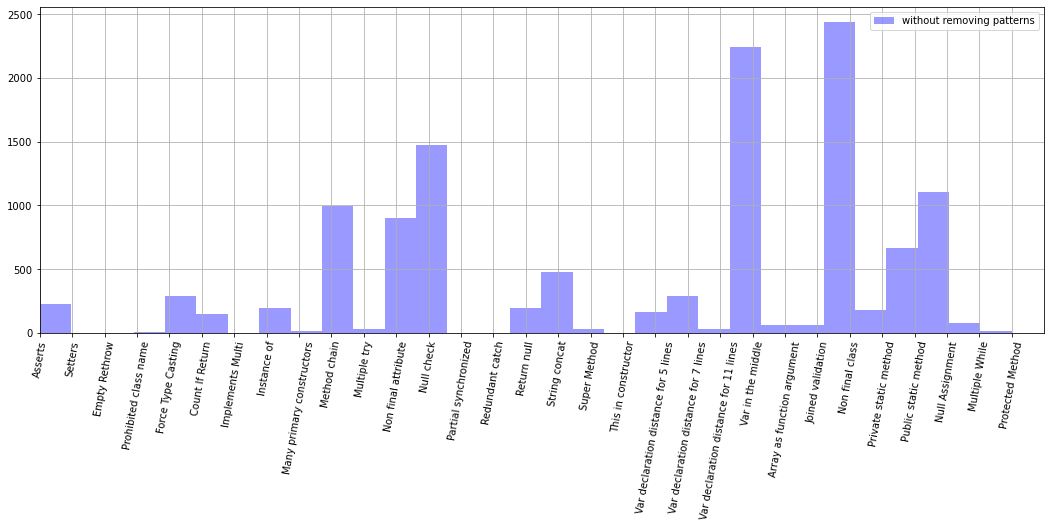

In [22]:
plt.figure(figsize=(18, 6))
sns.distplot(twofold_pred_log1[:, 0], label='without removing patterns', bins = FEATURES_NUMBER, hist = True, kde=False, color='b')
plt.grid()
plt.xlim(0, FEATURES_NUMBER)
plt.xticks(range(0, FEATURES_NUMBER), labels=ONLY_PATTERNS, rotation=80)
plt.legend();

# Table 1

In [23]:
k = twofold_pred_log1[:, 0]
m = np.zeros(twofold_pred_log1.shape[1])
p = np.zeros(twofold_pred_log1.shape[1])
for i in range(len(k)):
    if acts[i] == 1:
        m[k[i]] += 1
    elif acts[i] == 2:
        p[k[i]] += 1

In [24]:
def f(k):
    if k > 1000:
        return 4
    elif k > 100:
        return 3
    elif k > 10:
        return 2
    else:
        return 1

In [28]:
print("patterns                                  |  ", '-1   |', '+1 ')
print("_______________________________________________________")

for i in range(len(ONLY_PATTERNS)):
    print(ONLY_PATTERNS[i], ' ' * (40 - len(ONLY_PATTERNS[i])), '|', int(m[i]), ' ' * (5 - f(m[i])), '|', int(p[i]))
    

patterns                                  |   -1   | +1 
_______________________________________________________
Asserts                                   | 0      | 155
Setters                                   | 0      | 3
Empty Rethrow                             | 0      | 0
Prohibited class name                     | 4      | 0
Force Type Casting                        | 19     | 271
Count If Return                           | 148    | 0
Implements Multi                          | 3      | 0
Instance of                               | 196    | 0
Many primary constructors                 | 0      | 17
Method chain                              | 0      | 997
Multiple try                              | 31     | 3
Non final attribute                       | 1      | 900
Null check                                | 1472   | 0
Partial synchronized                      | 0      | 0
Redundant catch                           | 0      | 0
Return null                               | 1      | 

# Table2

In [67]:
class TwoFoldRankingModel0(BaseEstimator):

    def __init__(self):
        self.do_rename_columns = False
        self.model = None
        self.features_conf = None

    def fit(self, X, y, display=False):
        """
        Args:
            X: np.array with shape (number of snippets, number of patterns) or
                (number of patterns, ).
            y: np.array with shape (number of snippets,), array of snippets'
                complexity metric values
            display: bool, to output info about training or not
        """
        model = CatBoost()

        grid = {'learning_rate': [0.03, 0.1],
                'depth': [4, 6, 10],
                'l2_leaf_reg': [1, 3, 5, 7, 9]}

        #model.grid_search(
        #    grid,
        #    X=X,
        #    y=y,
        #    verbose=display,
        #)

        self.model = model
        self.model.fit(X, y.ravel(), logging_level='Silent')

    def __get_pairs(self, item, th: float):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        pattern_importances = item * self.model.feature_importances_
        # mask discards not significant patterns
        th_mask = (sigmoid(pattern_importances) <= th) + 0
        pattern_importances = pattern_importances * th_mask
        order = np.arange(self.model.feature_importances_.size)
        return (pattern_importances, order)

    def __vstack_arrays(self, res):
        return np.vstack(res).T

    def predict(self, X, return_acts=False, quantity_func='log', th=1.0):
        """
        Args:
            X: np.array with shape (number of snippets, number of patterns) or
                (number of patterns, ).
            quantity_func: str, type of function that will be applied to
                number of occurrences.
            th (float): Sensitivity of algorithm to recommend.
                0 - ignore all recomendations
                1 - use all recommendations
        Returns:
            ranked: np.array with shape (number of snippets, number of patterns)
                of sorted patterns in non-increasing order for each snippet of
                code.
        """

        if X.ndim == 1:
            X = X.copy()
            X = np.expand_dims(X, axis=0)

        ranked = []
        quantity_funcs = {
            'log': lambda x: np.log1p(x) / np.log(10),
            'exp': lambda x: np.exp(x + 1),
            'linear': lambda x: x,
        }

        for snippet in X:
            try:
                item = quantity_funcs[quantity_func](snippet)
                pairs = self.__vstack_arrays(self.__get_pairs(item, th))
                pairs = pairs[pairs[:, 0].argsort()]
                ranked.append(pairs[:, 1].T.tolist()[::-1])
            except Exception:
                raise Exception("Unknown func")

        if not return_acts:
            return (np.array(ranked), pairs[:, 0].T.tolist()[::-1])
        return np.array(ranked), pairs[:, 0].T.tolist()[::-1], np.zeros(X.shape[0]) - 1

    def get_array(self, X, mask, i, incr):
        """
        Args:
            X: np.array with shape (number of snippets, number of patterns).
            mask: np.array with shape (number of snippets, number of patterns).
            i: int, 0 <= i < number of patterns.
            add: bool.
        Returns:
            X1: modified np.array with shape (number of snippets, number of patterns).
        """

        X1 = X.copy()
        X1[:, i][mask[:, i]] += incr

        return X1

    def get_minimum(self, c1, c2, c3):
        """
        Args:
            c1, c2, c3: np.array with shape (number of snippets, ).
        Returns:
            c: np.array with shape (number of snippets, ) -
            elemental minimum of 3 arrays.
            number: np.array with shape (number of snippets, ) of
            arrays' numbers with minimum elements.            .
        """

        c = np.vstack((c1, c2, c3))

        return np.min(c, 0), np.argmin(c, 0)

    def informative(self, X, return_acts=False):
        """
        Args:
            X: np.array with shape (number of snippets, number of patterns) or
                (number of patterns, ).
        Returns:
            ranked: np.array with shape (number of snippets, number of patterns)
                of sorted patterns in non-increasing order for each snippet of
                code.
            acts: np.array with shape (number of snippets, ) of
            numbers of necessary actions for complexity's decrement.
            0 - do not modify the pattern, 1 - decrease by 1, 2 - increase by 1.
        """

        if X.ndim == 1:
            X = X.copy()
            X = np.expand_dims(X, axis=0)

        k = X.shape[1]
        complexity = self.model.predict(X)
        mask = X > 0
        importances = np.zeros(X.shape)
        actions = np.zeros(X.shape)
        acts_complexity = np.zeros((X.shape[1], 4))
        for i in range(k):
            complexity_minus = self.model.predict(self.get_array(X, mask, i, -1))
            complexity_plus = self.model.predict(self.get_array(X, mask, i, 1))
            c, number = self.get_minimum(complexity, complexity_minus, complexity_plus)
            importances[:, i] = complexity - c
            actions[:, i] = number
            
            acts_complexity[i, 0] += (complexity_minus < complexity).sum()
            acts_complexity[i, 1] += (complexity_plus < complexity).sum()
            acts_complexity[i, 2] += (complexity_plus > complexity).sum()
            acts_complexity[i, 3] += (complexity_minus > complexity).sum()
            

        ranked = np.argsort(-1 * importances, 1)
        if not return_acts:
            return ranked, importances, acts_complexity
        acts = actions[np.argsort(ranked, 1) == 0]
        return ranked, importances, acts_complexity, acts

In [68]:
%%time 

twofold_model2 = TwoFoldRankingModel0()
twofold_model2.fit(X_train, y_train)

Wall time: 7.14 s


In [69]:
twofold_pred_log2, _, acts_complexity, acts2 = twofold_model2.informative(X_test, return_acts = True)

In [70]:
print_scores(y_test, twofold_model2.model.predict(X_test))

MSE:  0.018161469367715
MAE:  0.09222187440262528
R2:   0.4791561053511094
VAR:   0.034869314115619894


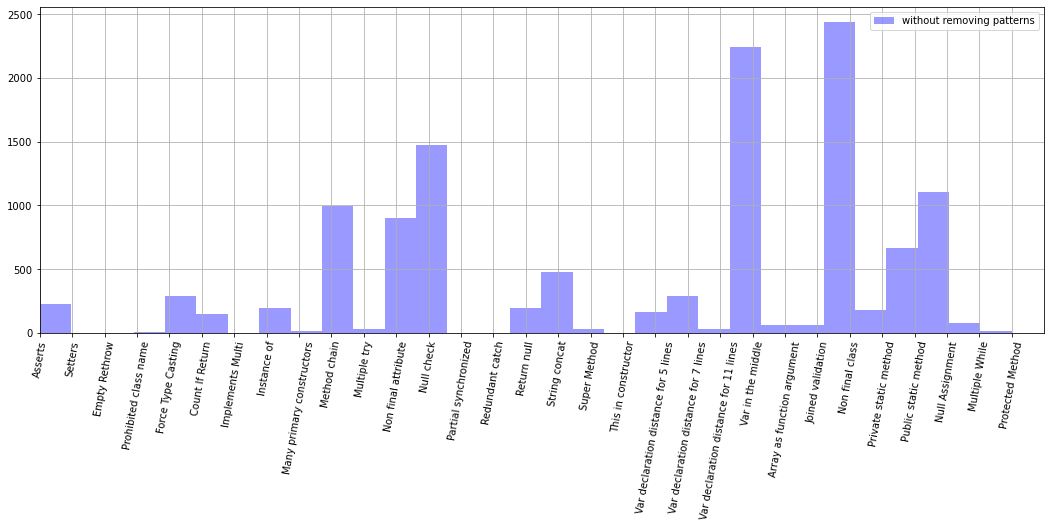

In [71]:
plt.figure(figsize=(18, 6))
sns.distplot(twofold_pred_log2[:, 0], label='without removing patterns', bins = FEATURES_NUMBER, hist = True, kde=False, color='b')
plt.grid()
plt.xlim(0, FEATURES_NUMBER)
plt.xticks(range(0, FEATURES_NUMBER), labels=ONLY_PATTERNS, rotation=80)
plt.legend();

In [72]:
k = twofold_pred_log2[:, 0]
m = np.zeros(twofold_pred_log2.shape[1])
p = np.zeros(twofold_pred_log2.shape[1])
for i in range(len(k)):
    if acts[i] == 1:
        m[k[i]] += 1
    elif acts[i] == 2:
        p[k[i]] += 1

In [73]:
print("p+ : pattern_increase")
print("p- : pattern_decrease")
print("c+ : complexity_increase")
print("c- : complexity_decrease")
print("_____________________________________________________________________________________________")
print("patterns                               |-1(top1)|+1(top1)|  p- c- |  p+ c- |  p+ c+ |  p- c+ |")
print("_____________________________________________________________________________________________")

for i in range(len(ONLY_PATTERNS)):
    a = int(m[i])
    b = int(p[i])
    p1 = int(acts_complexity[i, 0])
    p2 = int(acts_complexity[i, 1])
    p3 = int(acts_complexity[i, 2])
    p4 = int(acts_complexity[i, 3])
    pattern = ONLY_PATTERNS[i]
    print(pattern, ' ' * (37 - len(pattern)), '|', a, ' ' * (5 - f(a)), '|', b, ' ' * (5 - f(b)), '|', p1, ' ' * (5 - f(p1)), 
          '|', p2, ' ' * (5 - f(p2)), '|', p3, ' ' * (5 - f(p3)), '|', p4, ' ' * (5 - f(p4)), '|') 

p+ : pattern_increase
p- : pattern_decrease
c+ : complexity_increase
c- : complexity_decrease
_____________________________________________________________________________________________
patterns                               |-1(top1)|+1(top1)|  p- c- |  p+ c- |  p+ c+ |  p- c+ |
_____________________________________________________________________________________________
Asserts                                | 0      | 155    | 141    | 248    | 6      | 110    |
Setters                                | 0      | 3      | 117    | 1187   | 6      | 1076   |
Empty Rethrow                          | 0      | 0      | 107    | 1      | 120    | 11     |
Prohibited class name                  | 4      | 0      | 678    | 557    | 158    | 123    |
Force Type Casting                     | 19     | 271    | 2410   | 2192   | 1880   | 1666   |
Count If Return                        | 148    | 0      | 1057   | 290    | 840    | 78     |
Implements Multi                       | 3      | 0  

-----------------------------------------